First 5 rows of the dataset:
  invoice_no customer_id  gender  age  category  quantity    price  \
0    I138884     C241288  Female   28  Clothing         5  1500.40   
1    I317333     C111565    Male   21     Shoes         3  1800.51   
2    I127801     C266599    Male   20  Clothing         1   300.08   
3    I173702     C988172  Female   66     Shoes         5  3000.85   
4    I337046     C189076  Female   53     Books         4    60.60   

  payment_method invoice_date   shopping_mall  
0    Credit Card     5/8/2022          Kanyon  
1     Debit Card   12/12/2021  Forum Istanbul  
2           Cash    9/11/2021       Metrocity  
3    Credit Card   16/05/2021    Metropol AVM  
4           Cash   24/10/2021          Kanyon  

Last 5 rows of the dataset:
      invoice_no customer_id  gender  age         category  quantity    price  \
99452    I219422     C441542  Female   45         Souvenir         5    58.65   
99453    I325143     C569580    Male   27  Food & Beverage         2   

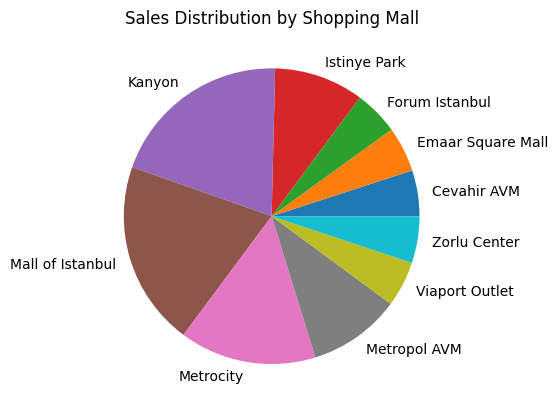

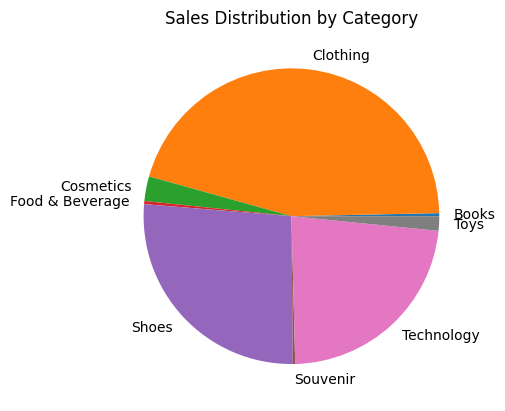


Pivot table showing sales by shopping mall and category:
category              Books    Clothing  Cosmetics  Food & Beverage  \
shopping_mall                                                         
Cevahir AVM        11998.80  1554414.40   88394.84         11992.39   
Emaar Square Mall  11059.50  1511803.04   92379.52         11030.07   
Forum Istanbul     11453.40  1572119.12   95225.72         10836.56   
Istinye Park       20725.20  3050313.20  178741.36         23419.94   
Kanyon             44980.35  6155541.04  372242.30         45474.85   
Mall of Istanbul   46949.85  6245565.04  373787.38         46431.94   
Metrocity          34405.65  4719958.32  272422.00         35375.72   
Metropol AVM       22240.20  3166444.16  185775.54         23984.78   
Viaport Outlet     10908.00  1530708.08   92664.14         11432.78   
Zorlu Center       12256.35  1568818.24   96974.10         11589.68   

category                Shoes  Souvenir  Technology       Toys  
shopping_mall           

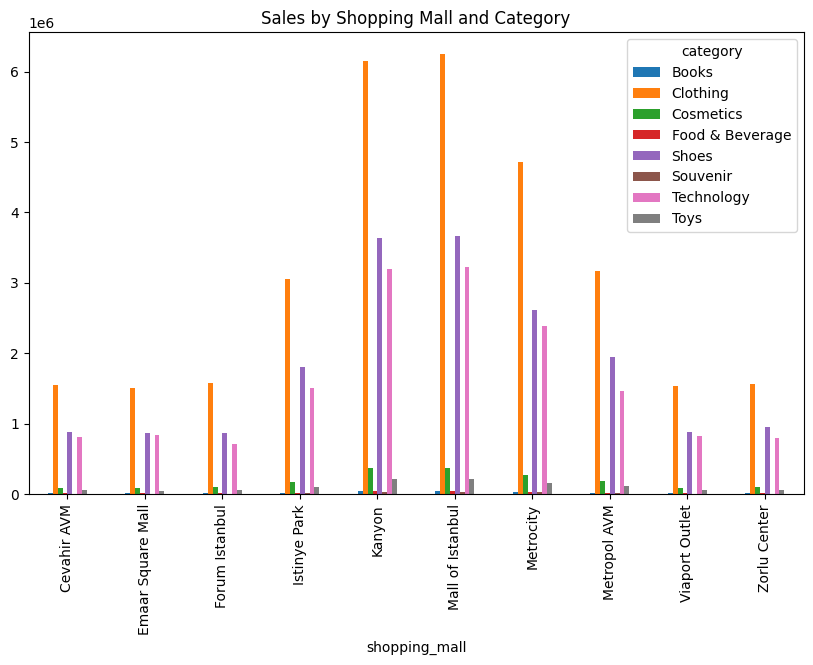

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset into a DataFrame
df = pd.read_csv("customer_shopping_data.csv") 

# Display the first 5 rows of the dataset to get a quick look at the data
print("First 5 rows of the dataset:")
print(df.head())

# Display the last 5 rows of the dataset to check the tail of the data
print("\nLast 5 rows of the dataset:")
print(df.tail())

# Count the number of entries for each shopping mall
print("\nNumber of entries for each shopping mall:")
print(df.groupby("shopping_mall").count())

# Count the number of entries for each product category
print("\nNumber of entries for each category:")
print(df.groupby("category").count())

# Calculate the total sales (sum) for each shopping mall
branch_sales = df.groupby("shopping_mall").sum()
print("\nTotal sales for each shopping mall:")
print(branch_sales)

# Calculate the total sales (sum) for each category
category_sales = df.groupby("category").sum()
print("\nTotal sales for each category:")
print(category_sales)

# Sort branch sales by the 'price' column in descending order to identify top-performing malls
sorted_branch_sales = branch_sales.sort_values(by="price", ascending=False)
print("\nBranch sales sorted by price (descending):")
print(sorted_branch_sales)

# Sort category sales by the 'price' column in descending order to find the highest revenue categories
sorted_category_sales = category_sales.sort_values(by="price", ascending=False)
print("\nCategory sales sorted by price (descending):")
print(sorted_category_sales)

# Group by both shopping mall and category to get total sales (sum) for each combination
combined_branch_category_sales = df.groupby(["shopping_mall", "category"]).sum()
print("\nTotal sales for each shopping mall and category combination:")
print(combined_branch_category_sales)

# Plot a pie chart showing the sales distribution by shopping mall
plt.pie(branch_sales["price"], labels=branch_sales.index) 
plt.title("Sales Distribution by Shopping Mall")
plt.show()

# Plot a pie chart showing the sales distribution by category
plt.pie(category_sales["price"], labels=category_sales.index) 
plt.title("Sales Distribution by Category")
plt.show()

# Create a pivot table to view sales by shopping mall and category, with prices summed up
combined_pivot = df.pivot_table(index="shopping_mall", columns="category", values="price", aggfunc="sum") 
print("\nPivot table showing sales by shopping mall and category:")
print(combined_pivot)

# Plot a bar chart of the pivot table to visually compare sales across malls and categories
combined_pivot.plot(kind="bar", figsize=(10, 6)) 
plt.title("Sales by Shopping Mall and Category")
plt.show()
